- title: Calculating a Permanent Magnet Field 
- author: Pat McCavana
- date: 2019-08-22
- category: python, Medical Physics
- slug: magnet_intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### I have a two neodymium magnets (1.28 Tesla) for bending electrons.

which look like this
![](images/magnet1260ct.png) 
### Lets see what the field looks like between them.

### For details of permanent magnetic formula see the following reference

:- https://pure.tue.nl/ws/files/3674252/719555.pdf

![](images/magnet_dimen.png) 
![](images/bfield.png) 


The magnetic flux density, B, describes the density and direction of the field lines that run through an area. The denser the field lines, the larger the magnetic flux density, which is measured in tesla (T).

In [19]:
def Br(x,y,z):
    '''
    magnet is 5cm x 5cm x 2.5cm
    '''
    if abs(x)<=0.025 and abs(y)<=0.025 and abs(z)<=0.0125:
        bx,by,bz = 0,0,0
    else:
        for i in [0,1]:
            for j in [0,1]:
                for p in [0,1]:
                    s=x-(-1)**i*0.025
                    t=y-(-1)**j*0.025
                    u=z-(-1)**p*0.0125
                    r=np.sqrt(s**2+t**2+u**2)
                    bx += (-1)**(i+j+p)*np.log(r-t)
                    by += (-1)**(i+j+p)*np.log(r-s)
                    bz += (-1)**(i+j+p)*np.arctan(s*t/(u*r))
    return(bx,by,bz)  

The residual magnetism of the magnet is 1.28 Tesla, the magnetic flux B at any point is then  $ \frac{1.28}{4\pi} Br $ but we can ignore the constants in this analysis.

In [20]:

#vectorize function for array calculations

xyzB = np.vectorize(Br)

In [21]:
# calculate out to 20cm along the mid plane of the magnet.

ex = np.arange(-0.2,0.201,0.001)
zed = np.arange(-0.2,0.201,0.001)
X,Z = np.meshgrid(ex, zed) # grid of point
Y = np.zeros((len(ex),len(zed)))

magnet = xyzB(X,Y,Z)

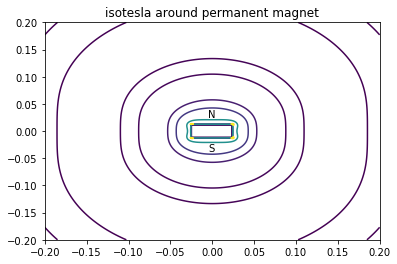

In [22]:
# plot some contour lines around the magnet
cont =[ 0.0005,0.005,0.01,0.05,0.1,0.5,1,3,6,12]

plt.contour(X,Z,(np.sqrt(magnet[2]**2+magnet[0]**2)),cont)
plt.title('isotesla around permanent magnet')
plt.text(-0.005,0.025,'N');plt.text(-0.005,-0.037,'S');

These are not the B field lines we all know from school. Where are they?

/Users/PMcC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/PMcC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


''

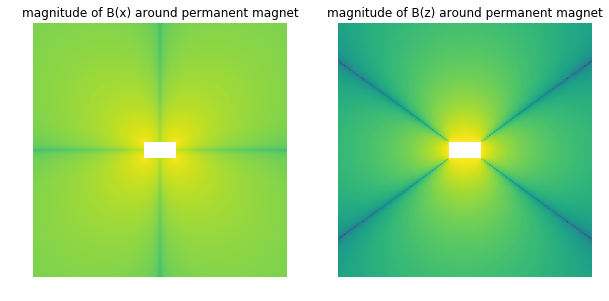

In [51]:
plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(magnet[0])))
plt.title('magnitude of B(x) around permanent magnet')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(magnet[2])))
plt.title('magnitude of B(z) around permanent magnet')
plt.axis('off')
;

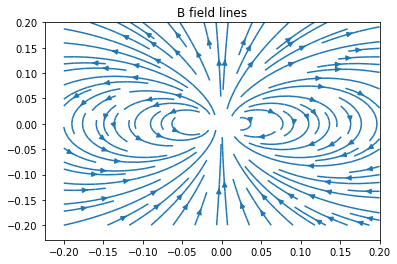

In [24]:
plt.streamplot(X, Z, magnet[0],magnet[2])

plt.title('B field lines');

The value of B along one of these lines can be determined. If we start at a point close to the magnet we can use the 
B vector direction to step along the field line. Here I am stepping along in 0.01 mm steps.

In [89]:
#lets calculate the x,y coordinate of a B field line

ex =0.015
why = 0.0
zed= 0.013

def newpos(x,y,z):
    bee = Br(x,y,z)
    diag = np.sqrt(bee[2]**2 + bee[0]**2)
    x = x + 0.00001*bee[0]/diag #bee[0]/100
    z = z + 0.00001*bee[2]/diag #bee[2]/100
    return (x,z)

position = [[],[],[]]
while (abs(ex)>0.025) or (abs(zed)>0.0125):
     
    ex,zed = newpos(ex,why,zed)
    position[0].append(ex)
    position[1].append(0)
    position[2].append(zed)

ex,why,zed

(0.014824600782364642, 0.0, -0.012494459734350712)

The field line can be plotted to check that it looks right.

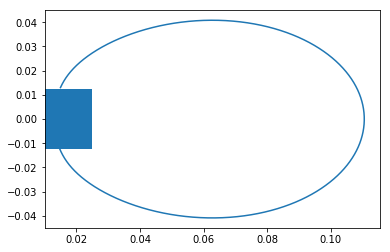

In [90]:
from matplotlib.patches import Rectangle

#plot the field line
plt.plot(position[0],position[2])
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0,-0.0125),.025,.025))

Now these points can be use to find the magnitude of B

In [91]:
#find B at each point of field line

b_online=[]
for i in range(len(position[0])):
    b_online.append(Br(position[0][i],position[1][i],position[2][i]))
    
    

In [96]:
flux_ar = np.array(b_online[:-1])

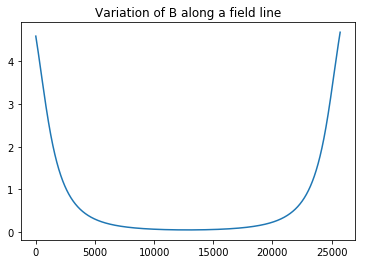

In [97]:
#Plot of |B| along the field line

plt.plot(np.sqrt(flux_ar[:,0]**2+flux_ar[:,2]**2));
plt.title('Variation of B along a field line');

# Why would any thing flow along this ?

In [98]:
#find the magnitude of B
b_scalar = np.sqrt(magnet[2]**2+magnet[0]**2)

\begin{align}
\nabla (  \vec{\mathbf{m}} \cdot \vec{\mathbf{B}} ) & = \vec{\mathbf{F}}
\end{align}

In [99]:
#lets assume m is unity and aligned to B

divb = np.gradient(b_scalar)


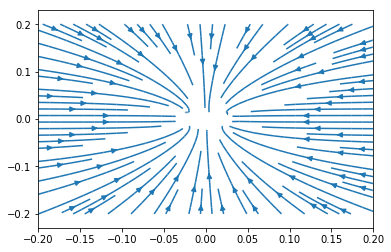

In [100]:
#this shows our line of force

plt.streamplot(X, Z, divb[1],divb[0])

In [19]:

# see fig 7 in below
# https://www.ethz.ch/content/dam/ethz/special-interest/mavt/robotics-n-intelligent-systems/multiscaleroboticlab-dam/documents/microrobotics/HS2015/Abbott2007.pdf

# Answer: it doesn't

So the field lines show the direction that a small magnet would align itself to, while feeling a force towards the magnet at right angles to this direction.
